# Classical electronic structure methods

In this part we will employ classical electronic structure methods of varying level of approximation for LiH molecule.

1. The Hartree_fock (HF) emploes mean-field approximation. This approximation does not include electronical correlations. 

2. The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators.

3. The full configuration interaction (FCI) method yields the exact ground state energy within a given basis set. The FCI wavefunction is written as a linear combination of all possible 𝑁-particle Slater determinants over the orbital basis.

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
# import frameworks, libraries
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES
from utility import *

In [2]:
basis = 'sto-3g'
bond_lengths = np.linspace(0.2, 4.5, 15)

#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -4.04172992851121 Eh
E = -7.073079372681468 Eh
E = -7.649043255824162 Eh
E = -7.832334925500518 Eh
E = -7.880049925724896 Eh
E = -7.8778748874412905 Eh
E = -7.857857629558147 Eh
E = -7.834269137861137 Eh
E = -7.814079197503813 Eh
E = -7.800070267984481 Eh
E = -7.791749416742661 Eh
E = -7.787213062268792 Eh
E = -7.784831935873606 Eh
E = -7.78360810928004 Eh
E = -7.782991125439795 Eh


In [3]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -3.999938081851393 Eh
E = -7.051610847582719 Eh
E = -7.6308307810191875 Eh
E = -7.81564261395 Eh
E = -7.861943682878373 Eh
E = -7.854927523570184 Eh
E = -7.826323082869348 Eh
E = -7.789717569125527 Eh
E = -7.751454728336359 Eh
E = -7.71497736172852 Eh
E = -7.682395096605642 Eh
E = -7.654776360429649 Eh
E = -7.632277256271371 Eh
E = -7.614450230131196 Eh
E = -7.6005742375892975 Eh


In [4]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -4.041626337621041 Eh
E = -7.073016111769886 Eh
E = -7.6490366177681235 Eh
E = -7.83232798868191 Eh
E = -7.88004009307263 Eh
E = -7.877860682859185 Eh
E = -7.857838159666159 Eh
E = -7.834239380731086 Eh
E = -7.814029903580407 Eh
E = -7.799994316710717 Eh
E = -7.791648704534822 Eh
E = -7.787093185185026 Eh
E = -7.784698570821434 Eh
E = -7.783466632906464 Eh
E = -7.782844327572514 Eh


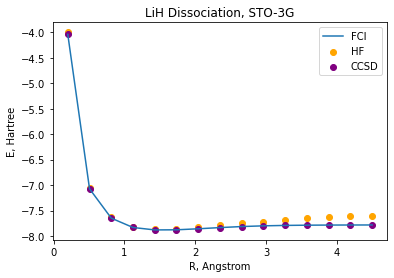

In [5]:
#Plot camparison of LiH PESs 

plt.title('LiH Dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

It can be infered from the results that all three approximation techniques can yield precise enought  approximation of the ground state energy of LiH molecule.

#  Generating Qubit Hamiltonians

Specify the Qubit Hamiltonian of a molecule:
- internuclear distances considered 1.6 Angstrom
- basis set: STO-3G
- and fermion-to-qubit transformation: Jordan-Wigner or Bravy-Kitaev

In [15]:
qubit_transf = 'jw' # Jordan-Wigner transformations
# qubit_transf = 'bk' # Bravy-Kitaev
lih = get_qubit_hamiltonian(mol='lih', geometry=1.6, basis='sto3g', qubit_transf=qubit_transf)
print(lih)


-4.135867179465943 [] +
0.02792749412238333 [X0 X1 X2] +
-0.0011731666554616925 [X0 X1 X2 X3 Y7 Y11] +
0.0008373476802250993 [X0 X1 X2 Y3 Y5] +
0.001552575195334851 [X0 X1 X2 Z3] +
0.0028825606404977626 [X0 X1 Z2 X3 Y7 Z9 Y10 X11] +
0.0031296735690042 [X0 X1 Z2 Y3 Y4 X5] +
-0.0010989079741346088 [X0 X1 X3 X4 Y7 Y11] +
0.0012438230812628923 [X0 X1 X3 Y4 Y5 Z6 Z7] +
0.0010989079741346088 [X0 X1 X3 Y4 Z5 Y7 Z9 Z10 X11] +
0.0025644258934386095 [X0 X1 X3 Z4 Y5 Y6 Z7] +
-0.0026108825817174205 [X0 X1 X3 Z4 Z5 Y7 Z9 Y10 X11] +
-0.0015119746075828117 [X0 X1 X3 Z4 Y7 Z9 Y10 X11] +
0.0015280816572417744 [X0 X1 X3 X6 Y7 Y11] +
-0.001675851365929084 [X0 X1 X3 Z6 Y7 Z9 Y10 X11] +
0.0015280816572417755 [X0 X1 X3 Y7 X8 Y11] +
-0.0015280816572417755 [X0 X1 X3 Y7 Y8 Z10 X11] +
-0.0016758513659290858 [X0 X1 X3 Y7 Z8 Z9 Y10 X11] +
-0.00014776970868731037 [X0 X1 X3 Y7 Z8 Y10 X11] +
-0.00166629868024623 [X0 X1 X3 Y7 Z9 Y10 X11] +
0.0007670968615068602 [X0 X1 X3 Y7 X10 Y11] +
-0.0004561551939841373 [X0 X1 Y3

In [7]:
print("The effective Hamiltonian:\n {}".format(taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf))) 

The effective Hamiltonian:
 -3.979394423886238 [] +
0.02792749412238333 [X0] +
-0.0032659954996587764 [X0 X1 Y2 Y3] +
0.008650156860610629 [X0 X1 Y2 Z3 Z6 Y7] +
0.0008373476802250993 [X0 X1 Z2 X3 Z4 Z5 Z7] +
-0.0011731666554616925 [X0 X1 Z2 Z4 Z5 Z6 X7] +
0.008650156860610629 [X0 X1 X3 X6] +
-0.0008373476802250993 [X0 X1 X3 Z6 Z7] +
0.005855668309943774 [X0 X1 X4] +
0.0058556683099437795 [X0 X1 X5] +
-0.03098161334462909 [X0 X1 Y6 Y7] +
0.0011731666554616925 [X0 X1 X7] +
0.0008373476802250991 [X0 Y1 Y2] +
0.0032659954996587764 [X0 Y1 Y2 X3] +
-0.0008373476802250991 [X0 Y1 Y2 Z3 Z4 Z5 Z7] +
-0.008650156860610629 [X0 Y1 Y2 Z3 Z6 X7] +
0.0008373476802250993 [X0 Y1 Z2 Y3 Z4 Z5 Z7] +
-0.0011731666554616925 [X0 Y1 Z2 Z3 Y6] +
0.0011731666554616925 [X0 Y1 Z2 Z4 Z5 Y6 Z7] +
-0.0011731666554616925 [X0 Y1 Z2 Z4 Z5 Z6 Y7] +
0.008650156860610629 [X0 Y1 Y3 X6] +
-0.0008373476802250993 [X0 Y1 Y3 Z6 Z7] +
0.005855668309943774 [X0 Y1 Y4] +
0.0058556683099437795 [X0 Y1 Y5] +
0.03098161334462909 [X0 Y1 

In [8]:
H_eff = taper_hamiltonian(lih, n_spin_orbitals=12, n_electrons=4, qubit_transf=qubit_transf)
H_eff

-3.979394423886238 [] +
0.02792749412238333 [X0] +
-0.0032659954996587764 [X0 X1 Y2 Y3] +
0.008650156860610629 [X0 X1 Y2 Z3 Z6 Y7] +
0.0008373476802250993 [X0 X1 Z2 X3 Z4 Z5 Z7] +
-0.0011731666554616925 [X0 X1 Z2 Z4 Z5 Z6 X7] +
0.008650156860610629 [X0 X1 X3 X6] +
-0.0008373476802250993 [X0 X1 X3 Z6 Z7] +
0.005855668309943774 [X0 X1 X4] +
0.0058556683099437795 [X0 X1 X5] +
-0.03098161334462909 [X0 X1 Y6 Y7] +
0.0011731666554616925 [X0 X1 X7] +
0.0008373476802250991 [X0 Y1 Y2] +
0.0032659954996587764 [X0 Y1 Y2 X3] +
-0.0008373476802250991 [X0 Y1 Y2 Z3 Z4 Z5 Z7] +
-0.008650156860610629 [X0 Y1 Y2 Z3 Z6 X7] +
0.0008373476802250993 [X0 Y1 Z2 Y3 Z4 Z5 Z7] +
-0.0011731666554616925 [X0 Y1 Z2 Z3 Y6] +
0.0011731666554616925 [X0 Y1 Z2 Z4 Z5 Y6 Z7] +
-0.0011731666554616925 [X0 Y1 Z2 Z4 Z5 Z6 Y7] +
0.008650156860610629 [X0 Y1 Y3 X6] +
-0.0008373476802250993 [X0 Y1 Y3 Z6 Z7] +
0.005855668309943774 [X0 Y1 Y4] +
0.0058556683099437795 [X0 Y1 Y5] +
0.03098161334462909 [X0 Y1 Y6 X7] +
0.00117316665546169

In [9]:
print("The ground state energy:")
obtain_PES('lih', [1], 'sto-3g', 'fci')


# Verify that the Hamiltonian includes the ground state. NEED NELP!!!
# Building the matrix representation of the effective Hamiltonian
# I, X, Z = np.identity(2), np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]])
# h4_matrix = -0.53105134 * I + 0.19679058 * X - 0.53505729 * Z

# # Obtain the eigenvalues
# eigvals, _ = np.linalg.eigh(h4_matrix)
# print("\nThe eigenvalues in the effective Hamiltonian: \n {}".format(eigvals))

The ground state energy:
E = -7.784460280267082 Eh


array([-7.78446028])

# Unitary ansatz entering the VQE

In this part we review two popular approaches of the ansatz:

- the unitary coupled cluster(UCC)
- qubit coupled cluster methodologies(QCC)

We will benchmark them for energy calculations of small molecules.

In [10]:
import tequila as tq
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

In [11]:
trotter_steps = 1

Below is a sample VQE simulation using the UCCSD ansatz compiled using a single trotter step for LiH in minimal basis at 𝑅=1.6 (Angstrom).

In [12]:
xyz_data = get_molecular_data('lih', geometry=1.6, xyz_format=True)

lih = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*lih.n_orbitals))

E_FCI = lih.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 12 

FCI energy: -7.882324378871238


In [13]:
H = lih.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = lih.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 631 terms


Number of UCCSD amplitudes: 24 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 1024 expectationvalues

active variables : 24

E=-7.86186477  angles= {(2, 1, 5, 0): 0.0, (5, 1, 2, 1): 0.0, (5, 0, 2, 0): 0.0, (2, 0, 2, 0): 0.0, (5, 0, 5, 0): 0.0, (4, 0, 4, 1): 0.0, (2, 1, 2, 1): 0.0, (2, 0, 5, 0): 0.0, (3, 1, 3, 1): 0.0, (4, 1, 4, 0): 0.0, (5, 1, 2, 0): 0.0, (3, 0, 3, 1): 0.0, (5, 0, 2, 1): 0.0, (5, 1, 5, 0): 0.0, (4, 0, 4, 0): 0.0, (2, 0, 5, 1): 0.0, (4, 1, 4, 1): 0.0, (2, 1, 5, 1): 0.0, (3, 0, 3, 0): 0.0, (5, 1, 5, 1): 0.0, (2, 0, 2, 1): 0.0, (5, 0, 5, 1): 0.0, (2, 1, 2, 0): 0.0, (3, 1, 3, 0): 0.0}  samples= None
E=-7.84478930  angles= {(2, 1, 5, 0): -0.007898330688476562, (5, 1, 2, 1): -0.06920766830444336, (5, 0, 2, 0): -0.00471067428

E=-7.88178896  angles= {(2, 1, 5, 0): -0.0005266010414231826, (5, 1, 2, 1): -0.04983091186302744, (5, 0, 2, 0): -9.454336202402306e-05, (2, 0, 2, 0): -0.0034816868465114927, (5, 0, 5, 0): 0.00010769522107154008, (4, 0, 4, 1): 0.0009049120380157415, (2, 1, 2, 1): -0.021204112413076917, (2, 0, 5, 0): -9.457375404074955e-05, (3, 1, 3, 1): -0.027236087523463248, (4, 1, 4, 0): 0.0009048336107759252, (5, 1, 2, 0): 9.403052872872009e-05, (3, 0, 3, 1): 0.0009047508771030855, (5, 0, 2, 1): -0.0005265761640654981, (5, 1, 5, 0): 0.00015482115264403497, (4, 0, 4, 0): -0.0014916476079619755, (2, 0, 5, 1): 9.39761409222663e-05, (4, 1, 4, 1): -0.02724223207367088, (2, 1, 5, 1): -0.04983089421982106, (3, 0, 3, 0): -0.001491596313656025, (5, 1, 5, 1): -0.11964246633691523, (2, 0, 2, 1): -0.00025250439489552315, (5, 0, 5, 1): 0.0001548603662639431, (2, 1, 2, 0): -0.0002525149904893694, (3, 1, 3, 0): 0.0009047728267424733}  samples= None
E=-7.88177914  angles= {(2, 1, 5, 0): -0.000992308014225841, (5, 1,

E=-7.88187528  angles= {(2, 1, 5, 0): -0.0006722031203970369, (5, 1, 2, 1): -0.052291340673502655, (5, 0, 2, 0): -0.00020582545406063694, (2, 0, 2, 0): -0.003897083076896966, (5, 0, 5, 0): -0.0010302214034723022, (4, 0, 4, 1): 0.0029573741833787705, (2, 1, 2, 1): -0.026458458889484712, (2, 0, 5, 0): -0.00020568730366740475, (3, 1, 3, 1): -0.026360116228261572, (4, 1, 4, 0): 0.002957295191971427, (5, 1, 2, 0): -0.0003949291368206968, (3, 0, 3, 1): 0.002957203270021878, (5, 0, 2, 1): -0.000672246021250091, (5, 1, 5, 0): 0.00026735192931448163, (4, 0, 4, 0): -0.0018198448694884048, (2, 0, 5, 1): -0.00039488733095816557, (4, 1, 4, 1): -0.026369427077267582, (2, 1, 5, 1): -0.05229139751759403, (3, 0, 3, 0): -0.001819735665096974, (5, 1, 5, 1): -0.11672856273067736, (2, 0, 2, 1): 3.448776137654578e-06, (5, 0, 5, 1): 0.00026746314468794973, (2, 1, 2, 0): 3.5013578134781935e-06, (3, 1, 3, 0): 0.0029573314030598213}  samples= None
E=-7.88187539  angles= {(2, 1, 5, 0): -0.0006625167442121253, (5

KeyboardInterrupt: 

In [14]:
yz_data = get_molecular_data('lih', geometry=1.6, xyz_format=True)

lih = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set='sto-3g')

hf_reference = hf_occ(2*lih.n_orbitals, lih.n_electrons)

H = lih.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

#Define number of entanglers to enter ansatz
n_ents = 1

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*lih.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))


entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*lih.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)



Hamiltonian has 631 terms

Grouping gradient magnitudes (Grouping : Gradient magnitude):
1 : 0.1239
2 : 0.0346
3 : 0.0346
4 : 0.0234
5 : 0.0234
6 : 0.0217
7 : 0.0131
8 : 0.0098
9 : 0.0098
10 : 0.0085
11 : 0.0075
12 : 0.0075
13 : 0.0075
14 : 0.0075
15 : 0.0024
16 : 0.0024
17 : 0.0017
18 : 0.0017
19 : 0.0011
20 : 0.0011
21 : 0.0006
22 : 0.0006
23 : 0.0002
24 : 0.0002
25 : 0.0001
26 : 0.0001
27 : 0.0
28 : 0.0
29 : 0.0
30 : 0.0
31 : 0.0
32 : 0.0

Selected entanglers:
1.0 [X2 Y3 X10 X11]


Below we perform the entangler screening protocol for LiH in minimal basis, and obtain one grouping of entanglers with non-zero energy gradient. We then select one of them to be used in the QCC VQE simulation.

In [31]:
xyz_data = get_molecular_data('lih', geometry=1.6, xyz_format=True)

lih = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set='sto-3g')

hf_reference = hf_occ(2*lih.n_orbitals, lih.n_electrons)

H = lih.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

#Define number of entanglers to enter ansatz
n_ents = 12

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*lih.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))


entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*lih.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)




Hamiltonian has 631 terms

Grouping gradient magnitudes (Grouping : Gradient magnitude):
1 : 0.1239
2 : 0.0346
3 : 0.0346
4 : 0.0234
5 : 0.0234
6 : 0.0217
7 : 0.0131
8 : 0.0098
9 : 0.0098
10 : 0.0085
11 : 0.0075
12 : 0.0075
13 : 0.0075
14 : 0.0075
15 : 0.0024
16 : 0.0024
17 : 0.0017
18 : 0.0017
19 : 0.0011
20 : 0.0011
21 : 0.0006
22 : 0.0006
23 : 0.0002
24 : 0.0002
25 : 0.0001
26 : 0.0001
27 : 0.0
28 : 0.0
29 : 0.0
30 : 0.0
31 : 0.0
32 : 0.0

Selected entanglers:
1.0 [X2 Y3 X10 X11]
1.0 [X2 Y3 X5 X10]
1.0 [X2 Y3 X4 X11]
1.0 [X2 Y3 X6 X7]
1.0 [X2 Y3 X8 X9]
1.0 [X0 Y1 X4 X5]
1.0 [X2 Y3 X4 X5]
1.0 [X0 Y1 X6 X7]
1.0 [X0 Y1 X8 X9]
1.0 [X0 Y1 X10 X11]
1.0 [X0 Y3 X6 X7]
1.0 [X0 Y3 X8 X9]


In [32]:
#Mean-field part of U (Omega):    
U_MF = construct_QMF_ansatz(n_qubits = 2*lih.n_orbitals)
#Entangling part of U:
U_ENT = construct_QCC_ansatz(entanglers)

U_QCC = U_MF + U_ENT

E = tq.ExpectationValue(H=H, U=U_QCC)

initial_vals = init_qcc_params(hf_reference, E.extract_variables())

#Minimize wrt the entangler amplitude and MF angles:
result = tq.minimize(objective=E, method="BFGS", initial_values=initial_vals, tol=1.e-6)

print('\nObtained QCC energy ({} entanglers): {}'.format(len(entanglers), result.energy))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 72 expectationvalues

active variables : 36

E=-6.31266422  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.141592653589793, gamma_10: 0.0, beta_11: 3.141592653589793, gamma_11: 0.0, tau_0: 0.0, tau_1: 0.0, tau_2: 0.0, tau_3: 0.0, tau_4: 0.0, tau_5: 0.0, tau_6: 0.0, tau_7: 0.0, tau_8: 0.0, tau_9: 0.0, tau_10: 0.0, tau_11: 0.0}  samples= None
E=-6.31378321  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2

E=-6.33996113  angles= {beta_0: 3.141599733328743, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.141592653589793, gamma_10: 0.0, beta_11: 3.1415973918935154, gamma_11: 0.0, tau_0: 0.3569158270225034, tau_1: 0.4267920672263004, tau_2: -0.42770962595007916, tau_3: -0.32207178333484104, tau_4: -0.3220717833348418, tau_5: 0.06660235818974716, tau_6: -0.27362443102797707, tau_7: -0.021387870916535323, tau_8: -0.0213878709165353, tau_9: 0.006165783274715688, tau_10: 0.03889210291534175, tau_11: 0.03889210291534175}  samples= None
E=-3.36116009  angles= {beta_0: 3.141631617556131, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.1415922835189867, gamma_3: 0.0, beta_4: 0.0, gamm

E=-6.53675773  angles= {beta_0: 3.141626648936926, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.14159280376793, gamma_2: 0.0, beta_3: 3.1415904791849236, gamma_3: 0.0, beta_4: 5.208002386526026e-07, gamma_4: 0.0, beta_5: -5.912626353771122e-07, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.1415920519590936, gamma_10: 0.0, beta_11: 3.141604064408049, gamma_11: 0.0, tau_0: 1.2948911334663662, tau_1: 1.4863419372845859, tau_2: -1.4888017482179134, tau_3: -0.808667133208193, tau_4: -0.8086671332048817, tau_5: 0.20822107654247862, tau_6: -1.1981287223792647, tau_7: -0.09226263698893596, tau_8: -0.09226263698864513, tau_9: 0.03472367063702727, tau_10: 0.11478429019287419, tau_11: 0.11478429019272603}  samples= None
E=-6.66734156  angles= {beta_0: 3.1416249238195513, gamma_0: 0.0, beta_1: 3.1415923603455256, gamma_1: 0.0, beta_2: 3.1415929770598865, gamma_2: 0.0, beta_3: 3.14158891176947

E=-7.36540840  angles= {beta_0: 3.1415925585334623, gamma_0: 0.0, beta_1: 3.1415901360983973, gamma_1: 0.0, beta_2: 3.14159106508641, gamma_2: 0.0, beta_3: 3.1414780344384194, gamma_3: 0.0, beta_4: 2.4611892413227197e-05, gamma_4: 0.0, beta_5: -1.0670637613474417e-05, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.1415932753589555, gamma_10: 0.0, beta_11: 3.1415891884197156, gamma_11: 0.0, tau_0: 0.12548708308197987, tau_1: 3.0159802128457893, tau_2: -3.0186016367150925, tau_3: -0.075619726043636, tau_4: -0.07561972602723552, tau_5: 0.010920800915638483, tau_6: -0.22450933949571614, tau_7: -0.006656068304911143, tau_8: -0.006656068303444403, tau_9: -0.0018507336534943821, tau_10: -0.006994973255429061, tau_11: -0.006994973256165972}  samples= None
E=-7.37538822  angles= {beta_0: 3.141577620457425, gamma_0: 0.0, beta_1: 3.141589860748106, gamma_1: 0.0, beta_2: 3.141591501403878, gamma_2: 0.0, beta_3: 3

E=-7.38270138  angles= {beta_0: 3.1415916955363925, gamma_0: 0.0, beta_1: 3.1415873276747983, gamma_1: 0.0, beta_2: 3.1416297362993775, gamma_2: 0.0, beta_3: 3.1409520630908876, gamma_3: 0.0, beta_4: 0.001248061145671631, gamma_4: 0.0, beta_5: -0.0005088524600620459, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.141617392198026, gamma_10: 0.0, beta_11: 3.1415873916484163, gamma_11: 0.0, tau_0: 0.22342977281362142, tau_1: 3.113300500698435, tau_2: -3.1118788332222493, tau_3: 0.04509442051152273, tau_4: 0.04509442052930345, tau_5: -2.8935405120870386e-05, tau_6: 0.01293861475161845, tau_7: 0.003988777262544834, tau_8: 0.003988777264144913, tau_9: 0.002346641280948472, tau_10: -0.005851905705130228, tau_11: -0.005851905705938667}  samples= None
E=-7.38270160  angles= {beta_0: 3.1415900041692626, gamma_0: 0.0, beta_1: 3.141582866387419, gamma_1: 0.0, beta_2: 3.1416911166867925, gamma_2: 0.0, beta_3: 3.14

E=-7.38277805  angles= {beta_0: 3.1414524929236047, gamma_0: 0.0, beta_1: 3.1412200258594285, gamma_1: 0.0, beta_2: 3.1466859158857123, gamma_2: 0.0, beta_3: 3.084127677609742, gamma_3: 0.0, beta_4: 0.1584427735881488, gamma_4: 0.0, beta_5: -0.0648877248902329, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.144733689223703, gamma_10: 0.0, beta_11: 3.141709525794226, gamma_11: 0.0, tau_0: 0.20725248677526487, tau_1: 3.2999989600278075, tau_2: -2.985958827910122, tau_3: 0.02723573120491915, tau_4: 0.02723573122278086, tau_5: -0.008732594627620301, tau_6: 0.03515969684558036, tau_7: 0.013844642551037383, tau_8: 0.013844642552650728, tau_9: 0.005031958352010926, tau_10: -0.009761519500073295, tau_11: -0.009761519500899494}  samples= None
E=-7.38277972  angles= {beta_0: 3.1414518002833622, gamma_0: 0.0, beta_1: 3.1412178468206418, gamma_1: 0.0, beta_2: 3.1467234629028416, gamma_2: 0.0, beta_3: 3.0838163460

E=-7.42288457  angles= {beta_0: 3.1435255708951932, gamma_0: 0.0, beta_1: 3.1417903606266044, gamma_1: 0.0, beta_2: 3.2496852553975417, gamma_2: 0.0, beta_3: 2.7788644379133056, gamma_3: 0.0, beta_4: 0.9924314845162336, gamma_4: 0.0, beta_5: -0.4406645426975427, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.175144379932553, gamma_10: 0.0, beta_11: 3.1383624436449677, gamma_11: 0.0, tau_0: 0.12575801898815206, tau_1: 3.8937982344039606, tau_2: -2.6907757226834232, tau_3: -0.029847685790258056, tau_4: -0.029847685698773677, tau_5: -0.030873255793424245, tau_6: 0.054724596251384726, tau_7: 0.03311618974906171, tau_8: 0.033116189984825434, tau_9: 0.01528406264876959, tau_10: -0.017413043194489046, tau_11: -0.017413043203967617}  samples= None
E=-7.31203715  angles= {beta_0: 3.1497973819838694, gamma_0: 0.0, beta_1: 3.145255535264017, gamma_1: 0.0, beta_2: 3.4969195863350206, gamma_2: 0.0, beta_3: 2.22616

E=-7.82157352  angles= {beta_0: 3.141292086583795, gamma_0: 0.0, beta_1: 3.1424752985192033, gamma_1: 0.0, beta_2: 3.3824333675428138, gamma_2: 0.0, beta_3: 2.6093905877557395, gamma_3: 0.0, beta_4: 3.037464525642268, gamma_4: 0.0, beta_5: -1.5702662424701461, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.1413026749172044, gamma_10: 0.0, beta_11: 3.171354423141173, gamma_11: 0.0, tau_0: 0.1709407374282609, tau_1: 2.946252550697301, tau_2: -3.162464671146537, tau_3: 0.03402969591282684, tau_4: 0.03402969650722598, tau_5: 0.0010240737266820933, tau_6: 0.003922975949201634, tau_7: 0.007806832941040878, tau_8: 0.007806834783113874, tau_9: 0.0037907633510107365, tau_10: -0.004275828998783045, tau_11: -0.00427582906733077}  samples= None
E=-7.84171315  angles= {beta_0: 3.1402770930439736, gamma_0: 0.0, beta_1: 3.1434021695369316, gamma_1: 0.0, beta_2: 3.125857448396737, gamma_2: 0.0, beta_3: 2.924870475855

E=-7.88141088  angles= {beta_0: 3.141678374307742, gamma_0: 0.0, beta_1: 3.141749437036591, gamma_1: 0.0, beta_2: 3.1784943135620125, gamma_2: 0.0, beta_3: 3.180888060603991, gamma_3: 0.0, beta_4: 3.166416149827594, gamma_4: 0.0, beta_5: -3.112606167998015, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.1391080849831225, gamma_10: 0.0, beta_11: 3.1415319957762065, gamma_11: 0.0, tau_0: 0.22674070679452613, tau_1: 3.0391520897915925, tau_2: -3.037300322589395, tau_3: 0.04169737732828392, tau_4: 0.04169737801218283, tau_5: 0.00629979333105208, tau_6: 0.05642168205195004, tau_7: 0.0047785035320861615, tau_8: 0.0047785056631223285, tau_9: 0.0024096518128779642, tau_10: -0.006259814161721386, tau_11: -0.006259814240790506}  samples= None
E=-7.88161495  angles= {beta_0: 3.1417992593235193, gamma_0: 0.0, beta_1: 3.141784179778496, gamma_1: 0.0, beta_2: 3.1554568302198702, gamma_2: 0.0, beta_3: 3.165970778707

E=-7.88171138  angles= {beta_0: 3.141592829140598, gamma_0: 0.0, beta_1: 3.1415927764098828, gamma_1: 0.0, beta_2: 3.141591992744348, gamma_2: 0.0, beta_3: 3.141594702477159, gamma_3: 0.0, beta_4: 3.141589744734492, gamma_4: 0.0, beta_5: -3.1415963087854144, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, beta_8: 0.0, gamma_8: 0.0, beta_9: 0.0, gamma_9: 0.0, beta_10: 3.1415979675910033, gamma_10: 0.0, beta_11: 3.1415961786458086, gamma_11: 0.0, tau_0: 0.23260177512492078, tau_1: 3.0382491091701977, tau_2: -3.0382482635023105, tau_3: 0.048399273041027015, tau_4: 0.04839927372474686, tau_5: 0.00788649888261764, tau_6: 0.053077758007101544, tau_7: 0.003508585102293103, tau_8: 0.0035085872333655683, tau_9: 0.002046587129051856, tau_10: -0.005806965523148703, tau_11: -0.00580696560222729}  samples= None
E=-7.88171138  angles= {beta_0: 3.141592832384222, gamma_0: 0.0, beta_1: 3.141592789440889, gamma_1: 0.0, beta_2: 3.1415939628776024, gamma_2: 0.0, beta_3: 3.141592965218

We see that the QCC energy converged to the FCI energy with 12 entangler.

# Measurement Grouping

Here we use 𝐻2 as an example for finding qubit-wise commuting (QWC) fragments. Notice below that each fragment has the same terms on all qubits.

In [33]:
lih = get_qubit_hamiltonian(mol='lih', geometry=1.6, basis='sto3g', qubit_transf='jw')

qwc_list = get_qwc_group(lih)
print('Fragments 1: \n{}\n'.format(qwc_list[4]))
print('Fragments 2:\n{}\n'.format(qwc_list[1]))
print('Number of fragments: {}'.format(len(qwc_list)))

Fragments 1: 
0.00013991219862428018 [X0 Z1 Z2 Y3 Y4 Z5 Z6 Z7 Z8 Z9 Z10 X11] +
0.06558452315458398 [Z6 Z8] +
0.0698018080330067 [Z6 Z9] +
0.0698018080330067 [Z7 Z8] +
0.06558452315458398 [Z7 Z9]

Fragments 2:
-0.0015280816572417744 [Y0 Z1 Z2 Z3 Z4 Z5 Y6 Y7 Z8 Z9 Z10 Y11] +
0.0990798459606058 [Z1 Z8] +
0.09662537527135197 [Z1 Z9] +
0.06168720475907334 [Z2 Z8] +
0.06754287306901711 [Z2 Z9] +
0.06754287306901711 [Z3 Z8] +
0.06168720475907334 [Z3 Z9] +
0.0601786622413958 [Z4 Z8] +
0.07049783624066826 [Z4 Z9] +
0.07049783624066826 [Z5 Z8] +
0.0601786622413958 [Z5 Z9] +
-0.23046822629623323 [Z8] +
0.07823637778985217 [Z8 Z9] +
0.06210154041892221 [Z8 Z10] +
-0.23046822629623323 [Z9] +
0.06703210442294599 [Z9 Z10]

Number of fragments: 154


Here, we obtain measurable parts of LiH by partitioning its terms into mutually commuting fragments. 

In [35]:
comm_groups = get_commuting_group(lih)
print('Number of mutually commuting fragments: {}'.format(len(comm_groups)))
print('The first commuting group')
print(comm_groups[1])

Number of mutually commuting fragments: 36
The first commuting group
-4.135867179465943 [] +
0.0033343945470462938 [X0 Y1 Y2 X3] +
-4.406931180206774e-05 [X0 Z1 Z2 X3 Y4 Y5] +
-0.0018721162275514474 [X0 Z1 Z2 X3 Y6 Y7] +
-0.0018721162275514482 [X0 Z1 Z2 X3 Y8 Y9] +
-2.978684888731335e-05 [X0 Z1 Z2 X3 Y10 Y11] +
0.0033343945470462938 [Y0 X1 X2 Y3] +
-4.406931180206774e-05 [Y0 Z1 Z2 Y3 X4 X5] +
-0.0018721162275514474 [Y0 Z1 Z2 Y3 X6 X7] +
-0.0018721162275514482 [Y0 Z1 Z2 Y3 X8 X9] +
-2.978684888731335e-05 [Y0 Z1 Z2 Y3 X10 X11] +
0.09167526006713483 [Z0 Z3] +
-4.406931180206774e-05 [X1 X2 X4 X5] +
-0.0018721162275514478 [X1 X2 X6 X7] +
-0.0018721162275514482 [X1 X2 X8 X9] +
-2.978684888731335e-05 [X1 X2 X10 X11] +
-4.406931180206774e-05 [Y1 Y2 Y4 Y5] +
-0.0018721162275514478 [Y1 Y2 Y6 Y7] +
-0.0018721162275514482 [Y1 Y2 Y8 Y9] +
-2.978684888731335e-05 [Y1 Y2 Y10 Y11] +
0.09167526006713483 [Z1 Z2] +
-0.01031917399927245 [X4 X5 Y6 Y7] +
-0.010319173999272456 [X4 X5 Y8 Y9] +
-0.0066120470661

To see this fragment is indeed measurable, one can construct the corresponding unitary operator $\hat U_n$.

In [36]:
uqwc = get_qwc_unitary(comm_groups[1])
print('This is unitary, U * U^+ = I ')
print(uqwc * uqwc)

This is unitary, U * U^+ = I 
(0.9999999999999999+0j) []


Applying this unitary gives the qubit-wise commuting form of the first mutually commuting group

In [37]:
qwc = remove_complex(uqwc * comm_groups[1] * uqwc)
print(qwc)

KeyboardInterrupt: 

In addition, current quantum computer can measure only the $z$ operators. Thus, QWC fragments with $x$ or $y$ operators require extra single-qubit unitaries that rotate them into $z$.  

In [38]:
uz = get_zform_unitary(qwc)
print("Checking whether U * U^+ is identity: {}".format(uz * uz))

allz = remove_complex(uz * qwc * uz)
print("\nThe all-z form of qwc fragment:\n{}".format(allz))

NameError: name 'qwc' is not defined

# Quantum Circuits

Quantum computers can only use a specific set of gates (universal gate set). Given the entanglers and their amplitudes found in Step 3, one can find corresponding representation of these operators in terms of elementary gates using the following procedure:

1. Set up the Hamiltonian in Tequila's format and the unitary gates obtained in Step 3. 


In [ ]:
H = tq.QubitHamiltonian.from_openfermion(get_qubit_hamiltonian('lih', 2, 'sto-3g', qubit_transf='jw'))

a = tq.Variable("tau_0")
U = construct_QMF_ansatz(4)

# check the following line
# U += tq.gates.ExpPauli(paulistring=tq.PauliString.from_string("X(0)Y(1)X(2)X(3)"), angle=a)
print(U)

In [ ]:
# check the expectation value to see it is near the ground state energy.

E = tq.ExpectationValue(H=H, U=U)
vars = {'beta_1': 3.141592624143881, 'beta_0': 3.141592624143881, 'tau_0': 1.1331410014096885, 'gamma_1': 0.0, 'beta_3': 0.0, 'gamma_3': 0.0, 'gamma_2': 0.0, 'gamma_0': 0.0, 'beta_2': 0.0} # values obtained from step 3
print(tq.simulate(E, variables=vars))

In [ ]:
tq.simulate(E, variables=vars, samples=100, backend="qiskit", device='ibmq_ourense')

# Print the quantum circuit
circ = tq.circuit.compiler.compile_exponential_pauli_gate(U)
tq.draw(circ, backend="qiskit")

Run on real quantum device.

In [ ]:
# from qiskit import IBMQ
# IBMQ.save_account('MY_API_TOKEN')